In [2]:
import glScale
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
#Open data
df = pd.read_csv('./datasets/glass.csv',header=None)

In [4]:
df.head()

0        1      2     3     4      5     6     7    8    9   10
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   1

In [6]:
df.columns =['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','label']

In [7]:
df.drop('Id',axis=1,inplace=True)

In [8]:
labels = df['label'].unique()

In [9]:
labels

array([1, 2, 3, 5, 6, 7])

In [10]:
df.shape

(214, 10)

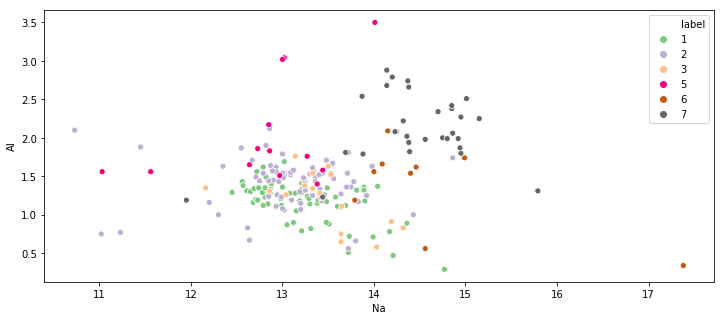

In [52]:
plt.figure(figsize=[12,5])
sns.scatterplot(data=df,x =df.columns[1],y=df.columns[3],hue='label',palette='Accent',legend="full")


In [23]:
from sklearn.cluster import KMeans

In [24]:
km = KMeans(n_clusters=len(labels))
km.fit(df[df.columns[0:-1]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
km.labels_.shape

(214,)

In [98]:
def map_kmeans(y,y_hat):
    """Recieves real labels y (*pd.Series) and predicted labels (y_hat = kmeans.labels_)"""
    labels = y.unique()
    mapping = {}
    for i in range(len(labels)):
        label_n = 0
        max_label = {}
        for label in labels:
            n_match = np.sum([(y_hat==i) & (y==label)])
            if  n_match > label_n:
                print('predicted "{}" with {} samples of "{}"'.format(i,n_match,label))
                label_n = n_match
                max_label = {i:label}
        mapping.update(max_label)
    return mapping
            

In [99]:
mapping = map_kmeans(df['label'],km.labels_)

predicted "0" with 3 samples of "5"
predicted "1" with 48 samples of "1"
predicted "1" with 61 samples of "2"
predicted "2" with 3 samples of "6"
predicted "2" with 23 samples of "7"
predicted "3" with 7 samples of "2"
predicted "4" with 22 samples of "1"
predicted "5" with 4 samples of "2"
predicted "5" with 10 samples of "5"


In [38]:
mapping

{0: 5, 1: 2, 2: 7, 3: 2, 4: 1, 5: 5}

In [74]:
km.cluster_centers_[0]

array([ 1.5149725, 13.5875   ,  1.485    ,  2.945    , 70.58     ,
        3.89     ,  6.3875   ,  0.9575   ,  0.       ])

In [75]:
km.cluster_centers_[5]

array([1.52013529e+00, 1.31335294e+01, 5.72941176e-01, 1.48647059e+00,
       7.30682353e+01, 5.01764706e-01, 1.10052941e+01, 1.41176471e-02,
       6.17647059e-02])

In [39]:
final_labels = [mapping[label] for label in km.labels_]

In [108]:
acc = np.sum(df['label']==final_labels)/df.shape[0]
print('Accuracy: ',acc)

Accuracy:  0.5887850467289719


In [86]:
km.cluster_centers_[0][3]

2.945

In [87]:
km.cluster_centers_[0][1]

13.5875

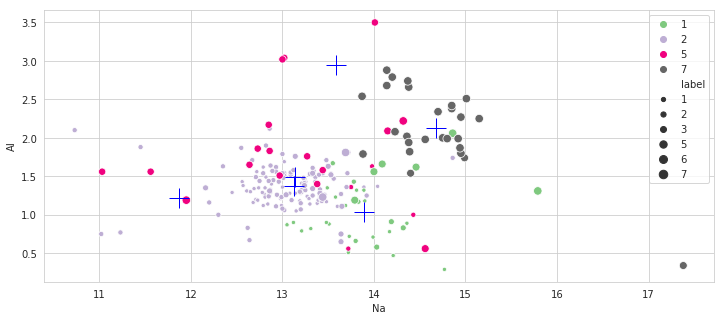

In [92]:
plt.figure(figsize=[12,5])
sns.scatterplot(data=df,x=df.columns[1],y=df.columns[3],hue=final_labels,size='label',palette='Accent',legend="full")

#plot centers
for i in range(len(labels)):
#i=0
    plt.plot(km.cluster_centers_[i][1],km.cluster_centers_[i][3],color='blue',marker='+',markersize='20')
plt.show()

## Z-score Standardization

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
cols=df.columns[0:-1]
std_scaler = StandardScaler()
df_std = pd.DataFrame(std_scaler.fit_transform(df[cols]))

In [57]:
df_std['label'] = df['label']
df_std.columns = df.columns

In [58]:
df_std.head()

RI        Na        Mg        Al        Si         K        Ca  \
0  0.872868  0.284953  1.254639 -0.692442 -1.127082 -0.671705 -0.145766   
1 -0.249333  0.591817  0.636168 -0.170460  0.102319 -0.026213 -0.793734   
2 -0.721318  0.149933  0.601422  0.190912  0.438787 -0.164533 -0.828949   
3 -0.232831 -0.242853  0.698710 -0.310994 -0.052974  0.112107 -0.519052   
4 -0.312045 -0.169205  0.650066 -0.411375  0.555256  0.081369 -0.624699   

         Ba        Fe  label  
0 -0.352877 -0.586451      1  
1 -0.352877 -0.586451      1  
2 -0.352877 -0.586451      1  
3 -0.352877 -0.586451      1  
4 -0.352877 -0.586451      1

In [59]:
km_std = KMeans(n_clusters=len(labels))
km_std.fit(df_std[df_std.columns[0:-1]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [100]:
mapping_std = map_kmeans(df_std['label'],km_std.labels_)
final_labels_std = [mapping_std[label] for label in km_std.labels_]

predicted "0" with 20 samples of "1"
predicted "1" with 38 samples of "1"
predicted "1" with 42 samples of "2"
predicted "2" with 12 samples of "1"
predicted "2" with 21 samples of "2"
predicted "3" with 7 samples of "2"
predicted "4" with 1 samples of "5"
predicted "4" with 25 samples of "7"
predicted "5" with 2 samples of "5"


In [110]:
acc_std = np.sum(df_std['label']==final_labels_std)/df_std.shape[0]
print('Accuracy with Standardization: ',acc_std)

Accuracy with Standardization:  0.5467289719626168


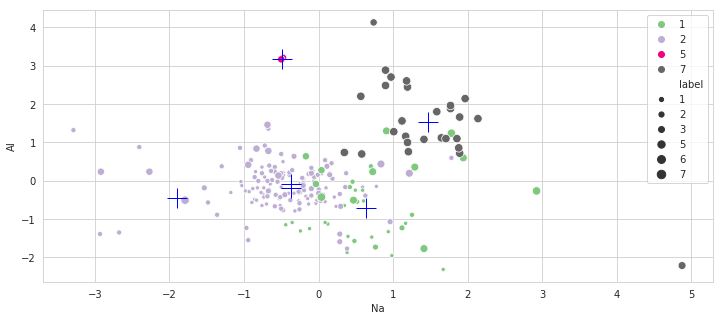

In [94]:
plt.figure(figsize=[12,5])
sns.scatterplot(data=df_std,x=df_std.columns[1],y=df_std.columns[3],hue=final_labels_std,size='label',palette='Accent',legend="full")
#plot centers
for i in range(len(labels)):
#i=0
    plt.plot(km_std.cluster_centers_[i][1],km_std.cluster_centers_[i][3],color='blue',marker='+',markersize='20')
plt.show()

## GL Scale

In [64]:
scale_gls = glScale.glScale(epochs=200,learning_rate=0.01,verbose_frequence=50,batch=5,sampled=False)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch: 50 MSError: 0.00968903
Epoch: 100 MSError: 0.0055936696
Epoch: 150 MSError: 0.0041282694
Epoch: 200 MSError: 0.0034612948


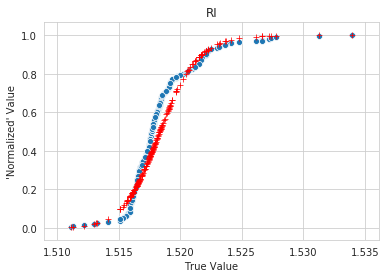

Epoch: 50 MSError: 0.007510266
Epoch: 100 MSError: 0.0035303389
Epoch: 150 MSError: 0.0024462005
Epoch: 200 MSError: 0.0020325196


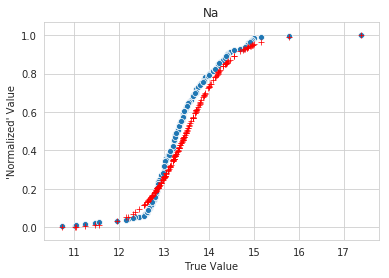

Epoch: 50 MSError: 0.02460937
Epoch: 100 MSError: 0.023713918
Epoch: 150 MSError: 0.023524264
Epoch: 200 MSError: 0.023455063


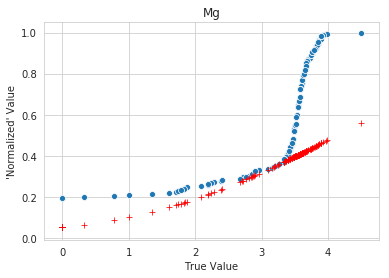

Epoch: 50 MSError: 0.007649703
Epoch: 100 MSError: 0.0037568477
Epoch: 150 MSError: 0.002441068
Epoch: 200 MSError: 0.0018665224


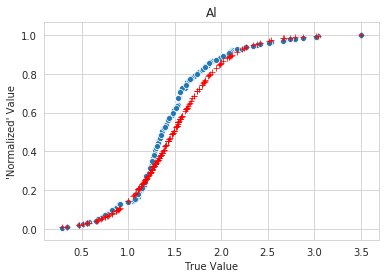

Epoch: 50 MSError: 0.008162455
Epoch: 100 MSError: 0.0031539586
Epoch: 150 MSError: 0.0017027765
Epoch: 200 MSError: 0.0011924364


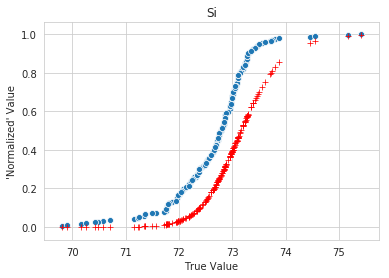

Epoch: 50 MSError: 0.012744056
Epoch: 100 MSError: 0.009994213
Epoch: 150 MSError: 0.008637477
Epoch: 200 MSError: 0.007915422


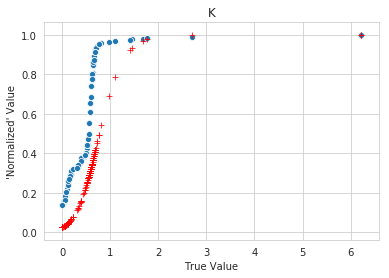

Epoch: 50 MSError: 0.017145663
Epoch: 100 MSError: 0.011087777
Epoch: 150 MSError: 0.008080709
Epoch: 200 MSError: 0.006357458


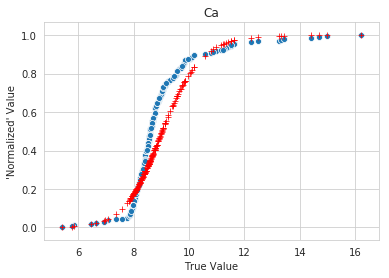

/home/gabriel/Desktop/repo/generalized-logistic-scale/glScale.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  B0 = (math.log( math.pow((1+Q0),math.log(10))-1 )-math.log(Q0))/(M0-min_value)


Epoch: 50 MSError: 0.00045669026
Epoch: 100 MSError: 0.00043330083
Epoch: 150 MSError: 0.00040912093
Epoch: 200 MSError: 0.00038397696


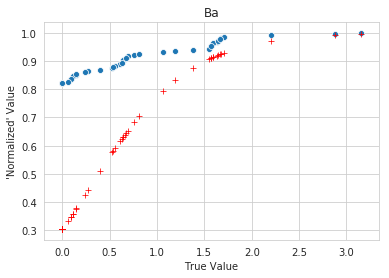

/home/gabriel/Desktop/repo/generalized-logistic-scale/glScale.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  B0 = (math.log( math.pow((1+Q0),math.log(10))-1 )-math.log(Q0))/(M0-min_value)


Epoch: 50 MSError: 0.001597844
Epoch: 100 MSError: 0.0011692992
Epoch: 150 MSError: 0.0008388977
Epoch: 200 MSError: 0.0006064495


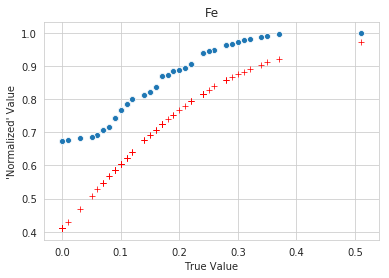

In [65]:
cols=df.columns[0:-1]
df_gls = pd.DataFrame()
for col in cols:
    df_gls[col] = scale_gls.fit_transform(df[col])
    plt.figure() 
    sns.set_style('whitegrid')
    sns.scatterplot(df[col],scale_gls.cdf)
    sns.scatterplot(df[col],df_gls[col],marker='+',color='r')
    plt.title(col)
    plt.xlabel('True Value')
    plt.ylabel("'Normalized' Value")
    plt.show()

In [66]:
df_gls['label']=df['label']

In [67]:
km_gls = KMeans(n_clusters=len(labels))
km_gls.fit(df_gls[df_gls.columns[0:-1]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [68]:
mapping_gls = map_kmeans(df_gls['label'],km_gls.labels_)
final_labels_gls = [mapping_gls[label] for label in km_gls.labels_]

In [71]:
mapping_gls

{0: 5, 1: 1, 2: 1, 3: 7, 4: 2, 5: 5}

In [111]:
acc_gls = np.sum(df_gls['label']==final_labels_gls)/df_gls.shape[0]
print('Accuracy with GLS: ',acc_gls)

Accuracy with GLS:  0.5327102803738317


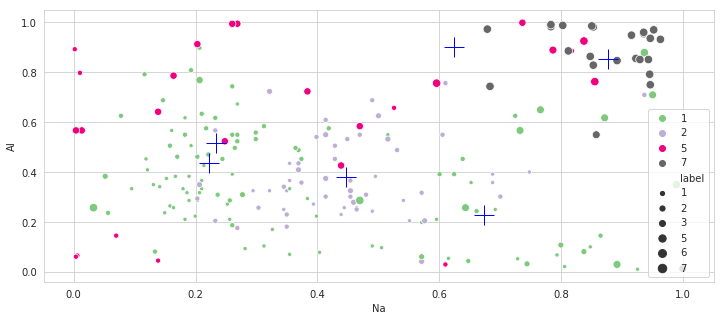

In [95]:
plt.figure(figsize=[12,5])
sns.scatterplot(data=df_gls,x=df_gls.columns[1],y=df_gls.columns[3],hue=final_labels_gls,size='label',palette='Accent',legend="full")
#plot centers
for i in range(len(labels)):
#i=0
    plt.plot(km_gls.cluster_centers_[i][1],km_gls.cluster_centers_[i][3],color='blue',marker='+',markersize='20')
plt.show()

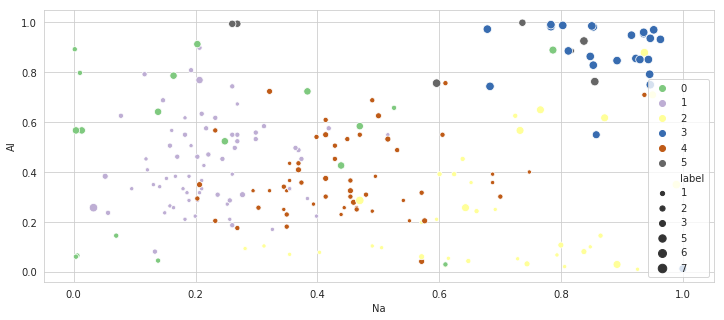

In [72]:
plt.figure(figsize=[12,5])
sns.scatterplot(data=df_gls,x=df_gls.columns[1],y=df_gls.columns[3],hue=km_gls.labels_,size='label',palette='Accent',legend="full")

In [97]:
np.sum(final_labels==final_labels_gls)

0